### Exploration of the boston_2016 bluebikes dataset for cleaning preparation

In [1]:
# from WS_05

# import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

import folium
from folium import plugins
from folium.plugins import HeatMap

import math
import random

from datetime import date, time, datetime, timedelta

In [3]:
### read in boston weather data to a Dataframe

weather = pd.read_csv("weather_hourly_boston.csv")

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [7]:
weather.isna().sum()

date_time    494
max_temp     494
min_temp     494
precip       492
dtype: int64

In [10]:
### weather date_time change Dtype from object to date_time
weather["date_time"] = pd.to_datetime(weather["date_time"])

### data has null values

In [11]:
### begin of 2016
dateY1 = datetime(year=2016, month=1, day=1, hour=0, minute= 0, second=1, microsecond=0)
print(dateY1)

2016-01-01 00:00:01


In [12]:
### end of 2016
dateY2 = datetime(year=2016, month=12, day=31, hour=23, minute= 59, second=59, microsecond=0)
print(dateY2)

2016-12-31 23:59:59


In [14]:
## only weather data from 2016
weather2016 = weather[(weather["date_time"] > dateY1) & (weather["date_time"] < dateY2)]
weather2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8689 entries, 8736 to 17542
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8689 non-null   datetime64[ns]
 1   max_temp   8689 non-null   float64       
 2   min_temp   8689 non-null   float64       
 3   precip     8689 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 339.4 KB


In [16]:
weather2016.isna().sum()

date_time    0
max_temp     0
min_temp     0
precip       0
dtype: int64

In [17]:
# Let's map time of day and day of week to our DF

def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

def get_minute (ts):
    return ts.minute

0 Null values in 2016 data, save to drop all null values from weather dataframe

In [20]:
weather.dropna(inplace = True)

In [21]:
weather16 = weather[(weather["date_time"] > dateY1) & (weather["date_time"] < dateY2)]
weather16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8689 entries, 8736 to 17542
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8689 non-null   datetime64[ns]
 1   max_temp   8689 non-null   float64       
 2   min_temp   8689 non-null   float64       
 3   precip     8689 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 339.4 KB


In [40]:
### add seperate date and hour data
weather16["date"] = weather16["date_time"].apply(lambda ts: get_date (ts))
weather16["weekday"] = weather16["date_time"].apply(lambda ts: get_weekday (ts))
weather16["hour"] = weather16["date_time"].apply(lambda x: get_hour (x))

<ipython-input-40-164167963dce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather16["date"] = weather16["date_time"].apply(lambda ts: get_date (ts))
<ipython-input-40-164167963dce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather16["weekday"] = weather16["date_time"].apply(lambda ts: get_weekday (ts))
<ipython-input-40-164167963dce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [41]:
weather16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8689 entries, 8736 to 17542
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8689 non-null   datetime64[ns]
 1   max_temp   8689 non-null   float64       
 2   min_temp   8689 non-null   float64       
 3   precip     8689 non-null   float64       
 4   date       8689 non-null   object        
 5   hour       8689 non-null   int64         
 6   weekday    8689 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 543.1+ KB


In [42]:
### date type to datetime
weather16["date"] = pd.to_datetime(weather16["date"])

<ipython-input-42-6efcca3dc93d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather16["date"] = pd.to_datetime(weather16["date"])


In [43]:
weather16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8689 entries, 8736 to 17542
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8689 non-null   datetime64[ns]
 1   max_temp   8689 non-null   float64       
 2   min_temp   8689 non-null   float64       
 3   precip     8689 non-null   float64       
 4   date       8689 non-null   datetime64[ns]
 5   hour       8689 non-null   int64         
 6   weekday    8689 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 543.1 KB


In [44]:
### nb. of hours with max_temp > min_temp
len(weather16.loc[weather16.max_temp > weather16.min_temp])

564

In [45]:
### nb. of hours with max_temp = min_temp
len(weather16.loc[weather16.max_temp == weather16.min_temp])

8125

In [46]:
### nb. of hours with weather preciptions, like snow or rainfall 
len(weather16.loc[weather16.precip == 1.0])

703

In [47]:
### nb. of hours without weather preciptions
len(weather16.loc[weather16.precip == 0.0])

7986

In [48]:
### weather 2016 max_temp max.
weather16["max_temp"].max()

36.1

In [49]:
### weather 2016 min_temp max.
weather2016["min_temp"].max()

36.1

In [50]:
### weather 2016 max_temp min.
weather2016["max_temp"].min()

-22.8

In [51]:
### weather 2016 min_temp min.
weather2016["min_temp"].min()

-22.8

In [52]:
### weather 2016 max_temp mean.
weather2016["max_temp"].mean()

11.737058349637453

In [53]:
### weather 2016 min_temp mean.
weather2016["min_temp"].mean()

11.684014270917245

### plot some data

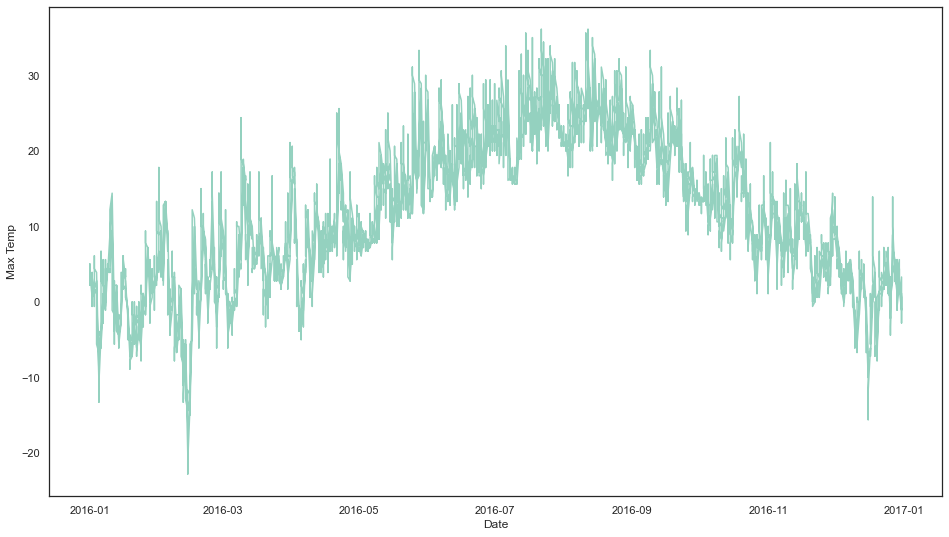

In [54]:
fig, ax = plt.subplots(figsize = (16,9))

# Plotting the data
ax.plot(weather16["date"],weather16[["max_temp"]])
ax.set_xlabel("Date")
ax.set_ylabel("Max Temp")
plt.show()

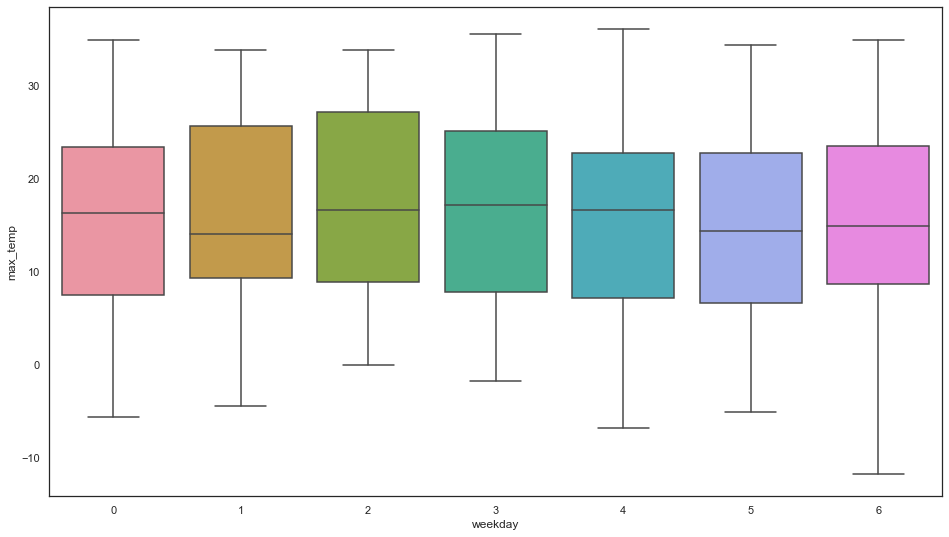

In [62]:

weather16_temp = weather16.groupby(["date", "weekday"])["max_temp"].max()
weather16_temp = pd.DataFrame(weather16_temp)

fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=weather16_temp.index.get_level_values(1), y=weather16_temp["max_temp"],ax=ax)
plt.show()

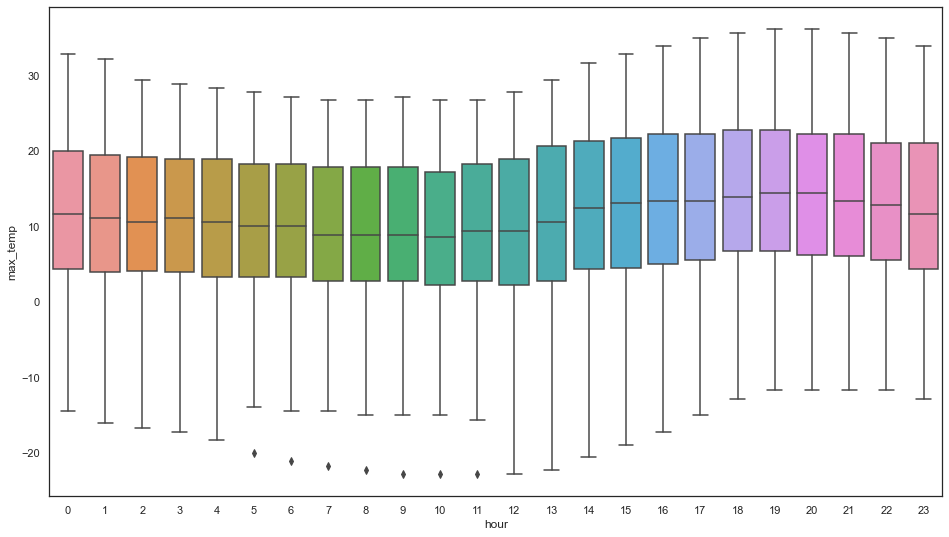

In [63]:
weather16_temp = weather16.groupby(["date", "hour"])["max_temp"].max()
weather16_temp = pd.DataFrame(weather16_temp)

fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=weather16_temp.index.get_level_values(1), y=weather16_temp["max_temp"],ax=ax)
plt.show()